###Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Loading the dataset

In [2]:
df = pd.read_csv('/content/airlines_flights_data.csv')

In [3]:
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


###Cleaning the dataset

In [4]:
def clean_df(df: pd.DataFrame):

  df['days_left'] = df['days_left'].astype(int)
  df['price'] = df['price'].astype(float)

  df['duration'] = df['duration'].astype(float)
  df['hours'] = df['duration'].astype(int)
  df['minutes'] = ((df['duration'] - df['hours']) * 60).round().astype(int)
  df['duration_time'] = df.apply(lambda row: f"{row['hours']:02d}:{row['minutes']:02d}", axis = 1)
  # df['duration'] = pd.to_datetime(df['duration_time'], format="%H:%M").time()
  df['duration'] = pd.to_timedelta(df['hours'], unit = 'h') + pd.to_timedelta(df['minutes'], unit = 'm')

  df.set_index(df['index'], inplace = True)

  df = df.drop(columns = ['hours','minutes','duration_time','index'])
  return df

In [5]:
df = clean_df(df)

In [6]:
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0 days 02:10:00,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0 days 02:20:00,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0 days 02:10:00,1,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0 days 02:15:00,1,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0 days 02:20:00,1,5955.0


####1) Average price per airlines

In [7]:
appa = df[['airline', 'price']]

avg_price_per_airline = appa.groupby('airline').mean()
print(avg_price_per_airline)

                  price
airline                
AirAsia     4091.072742
Air_India  23507.019112
GO_FIRST    5652.007595
Indigo      5324.216303
SpiceJet    6179.278881
Vistara    30396.536302


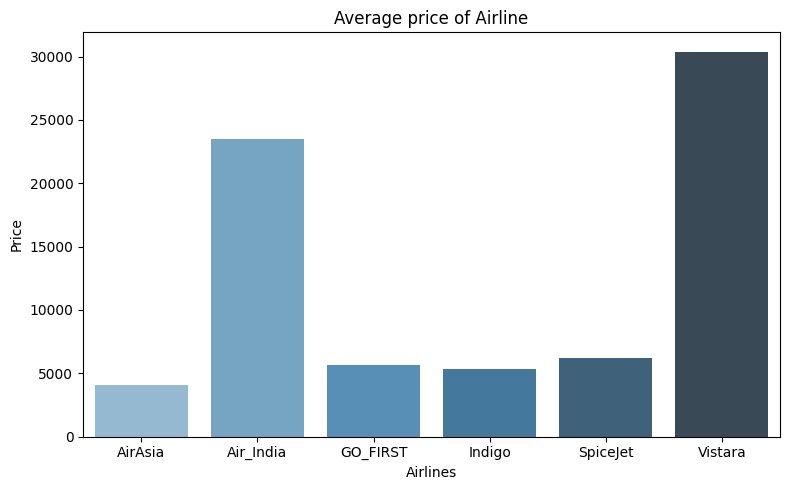

In [8]:
plt.figure(figsize = (8,5))
sns.barplot(data = avg_price_per_airline, x = 'airline', y = 'price', estimator = 'mean',  palette = 'Blues_d', errorbar= None, hue = 'airline', legend = False)
plt.title('Average price of Airline')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

####2) Top 10 routes

In [9]:
route_counts = df.groupby(['source_city', 'destination_city']).size().reset_index(name = 'count')
route_counts = route_counts.sort_values(by = 'count', ascending = False)
route_counts.head(10)

,source_city,destination_city,count
14,Delhi,Mumbai,15289
27,Mumbai,Delhi,14809
10,Delhi,Bangalore,14012
1,Bangalore,Delhi,13756
4,Bangalore,Mumbai,12939
25,Mumbai,Bangalore,12885
29,Mumbai,Kolkata,12602
13,Delhi,Kolkata,11934
24,Kolkata,Mumbai,11467
11,Delhi,Chennai,10780


####3) Cheapest airlines per route

In [10]:
cheapest_airline = df[['airline', 'source_city', 'destination_city', 'price']]
cheapest_airline = cheapest_airline.sort_values(by = 'price', ascending = True)


cheapest_airline_price = cheapest_airline.drop_duplicates(subset = ['source_city', 'destination_city'], keep = 'first')
cheapest_airline_price = cheapest_airline_price.reset_index(drop = True   )

cheapest_airline_price.head(5)

,airline,source_city,destination_city,price
0,GO_FIRST,Chennai,Hyderabad,1105.0
1,Indigo,Chennai,Bangalore,1443.0
2,Indigo,Hyderabad,Chennai,1543.0
3,AirAsia,Bangalore,Chennai,1603.0
4,Indigo,Bangalore,Hyderabad,1694.0


In [11]:
idx = df.groupby(['source_city', 'destination_city'])['price'].idxmin()
cheapest_airline_price = df.loc[idx, ['airline', 'source_city', 'destination_city', 'price']]
cheapest_airline_price.head(5)

,airline,source_city,destination_city,price
index,,,,
117897,AirAsia,Bangalore,Chennai,1603.0
86767,AirAsia,Bangalore,Delhi,2723.0
113144,Indigo,Bangalore,Hyderabad,1694.0
106867,Indigo,Bangalore,Kolkata,3026.0
96418,Vistara,Bangalore,Mumbai,2150.0


####4) Average price by Flight time

In [12]:
print(df['departure_time'].unique())
print(df['arrival_time'].unique())

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


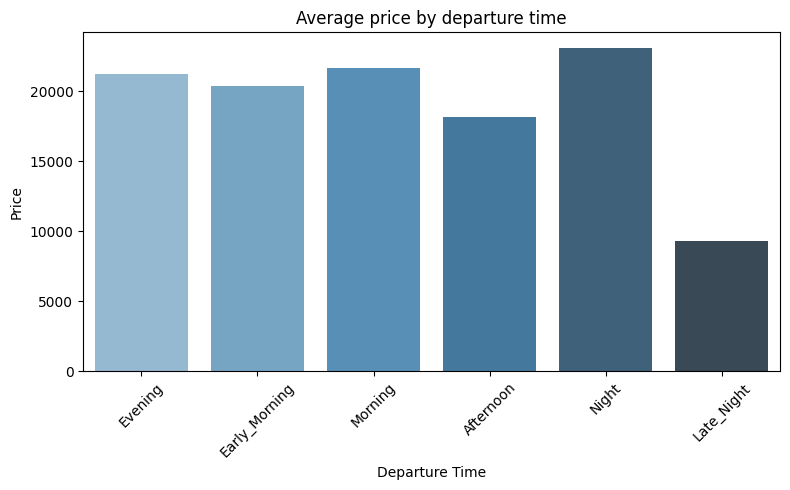

In [13]:
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = 'departure_time', y = 'price', estimator = 'mean',  palette = 'Blues_d', errorbar= None, hue = 'departure_time', legend = False)
plt.title('Average price by departure time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

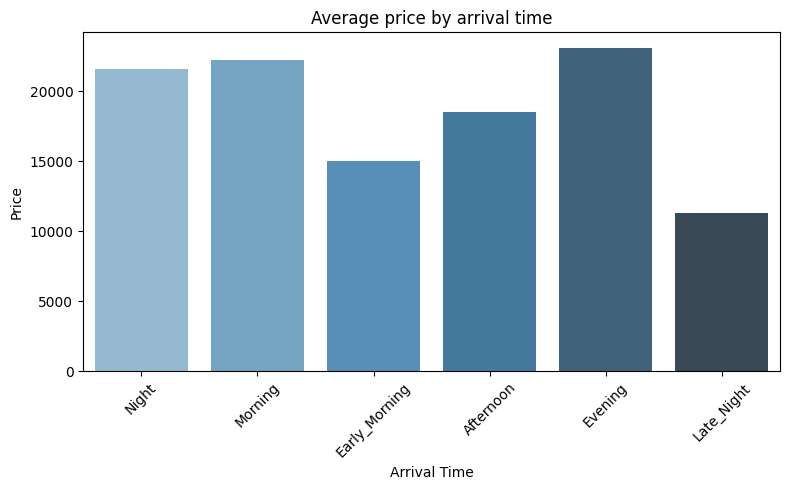

In [14]:
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = 'arrival_time', y ='price', estimator = 'mean', palette = 'Blues_d', errorbar = None, hue = 'arrival_time', legend = False)
plt.title('Average price by arrival time')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

####5)Average price by days left for booking

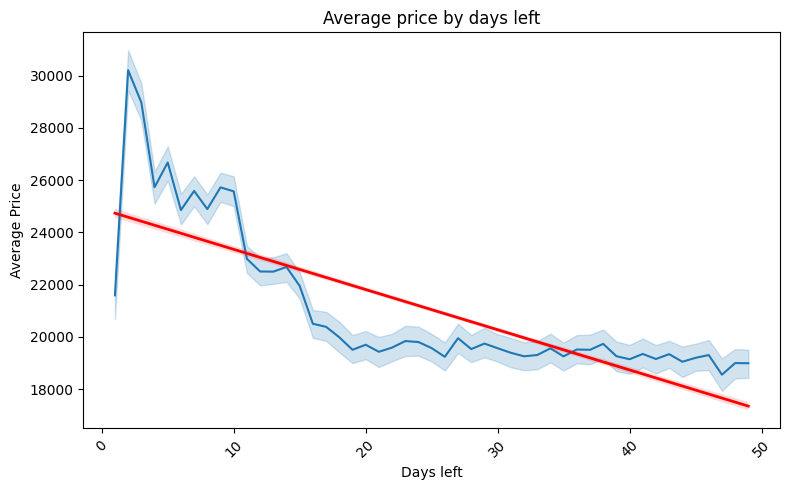

In [15]:
plt.figure(figsize = (8,5))
sns.lineplot(data = df, x = 'days_left', y = 'price', estimator = 'mean')
sns.regplot(data = df, x = 'days_left', y ='price', scatter = False, color = 'red', line_kws = {'linewidth': 2})
plt.title('Average price by days left')
plt.xlabel('Days left')
plt.ylabel('Average Price')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

####6) Average price per class

In [16]:
classes = df[['class', 'price']]
class_price = classes.groupby('class').mean()
class_price

,price
class,
Business,52540.081124
Economy,6572.342383


####7) Price by number of transits

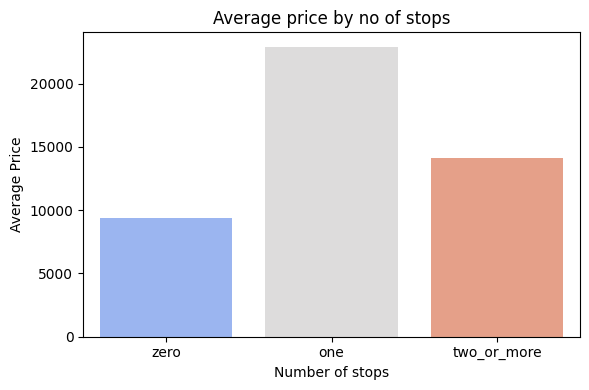

In [17]:
plt.figure(figsize = (6,4))
sns.barplot(data = df, x = 'stops', y = 'price', estimator = 'mean', errorbar = None, palette = 'coolwarm', hue = 'stops', legend = False)
plt.title('Average price by no of stops')
plt.xlabel('Number of stops')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

####8) Price of Non-stop flights

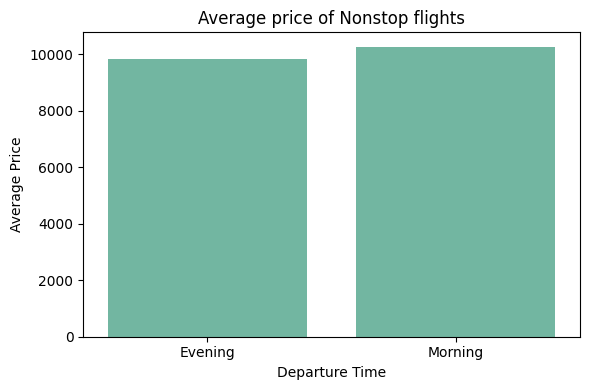

In [18]:
nonstop_flights = df[df['stops'] == 'zero']
nonstop_morning_evening = nonstop_flights[nonstop_flights['departure_time'].isin(['Morning', 'Evening'])]

plt.figure(figsize = (6,4))
sns.barplot(data = nonstop_morning_evening, x = 'departure_time', y = 'price', estimator = 'mean', errorbar = None, palette = 'Set2', hue = 'stops', legend = False)
plt.title('Average price of Nonstop flights')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

####9) Correlation between flight duration and price

In [19]:
df['duration_hour'] = df['duration'].dt.total_seconds() / 3600
df['duration_hour'].describe()

,duration_hour
count,300153.000000
mean,12.220984
std,7.191973
min,0.833333
25%,6.833333
50%,11.250000
75%,16.166667
max,49.833333


In [20]:
longer_duration = df[df['duration_hour'] > df['duration_hour'].quantile(0.75)]
longer_duration[['duration_hour', 'price']].corr(method = 'pearson')

,duration_hour,price
duration_hour,1.000000,-0.086364
price,-0.086364,1.000000


####10) Heatmap of average price by routes

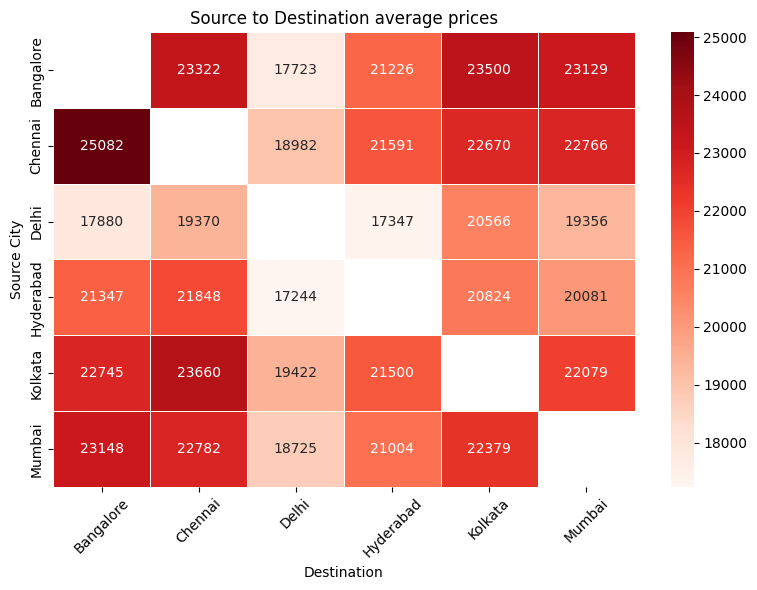

In [21]:
pivot = df.groupby(['source_city', 'destination_city'])['price'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Reds', linewidths = 0.5)
plt.title('Source to Destination average prices')
plt.xlabel('Destination')
plt.ylabel('Source City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()